<a href="https://colab.research.google.com/github/DevashishX/TF2Models/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
from matplotlib import style
# style.reset()
style.use('seaborn')

2.2.0


In [107]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [108]:
x_train.shape

(60000, 28, 28)

In [109]:
# the data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [96]:
i = Input(shape=x_train[0].shape)
x = Conv2D(filters=8, kernel_size=(3, 3), strides=1, activation="relu")(i)
x = Conv2D(filters=8, kernel_size=(4, 4), strides=2, activation="relu")(x)
x = Conv2D(filters=8, kernel_size=(4, 4), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(10, activation="softmax")(x)

model = Model(i, x)

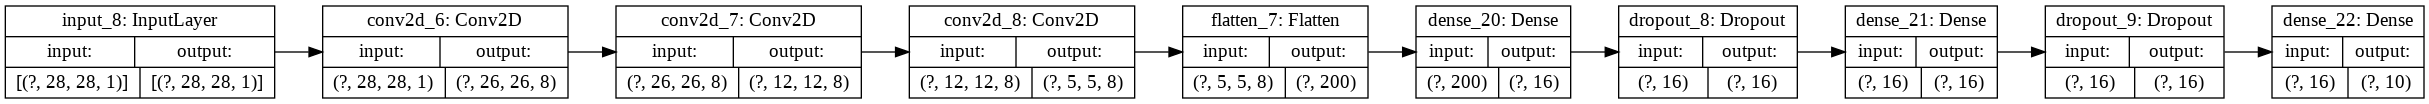

In [97]:
modelgraph = tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)
# summary = model.summary()
# print(summary)
display(modelgraph)

In [98]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [99]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7500 - accuracy: 0.7486 - val_loss: 0.1773 - val_accuracy: 0.9522
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3807 - accuracy: 0.8802 - val_loss: 0.1260 - val_accuracy: 0.9638
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3127 - accuracy: 0.9030 - val_loss: 0.1032 - val_accuracy: 0.9708
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2772 - accuracy: 0.9158 - val_loss: 0.0956 - val_accuracy: 0.9712
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2559 - accuracy: 0.9233 - val_loss: 0.0892 - val_accuracy: 0.9739
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2251 - accuracy: 0.9339 - val_loss: 0.0740 - val_accuracy: 0.9775
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2076 - accuracy: 0.9378 - val_loss: 0.0690 - val_accuracy:

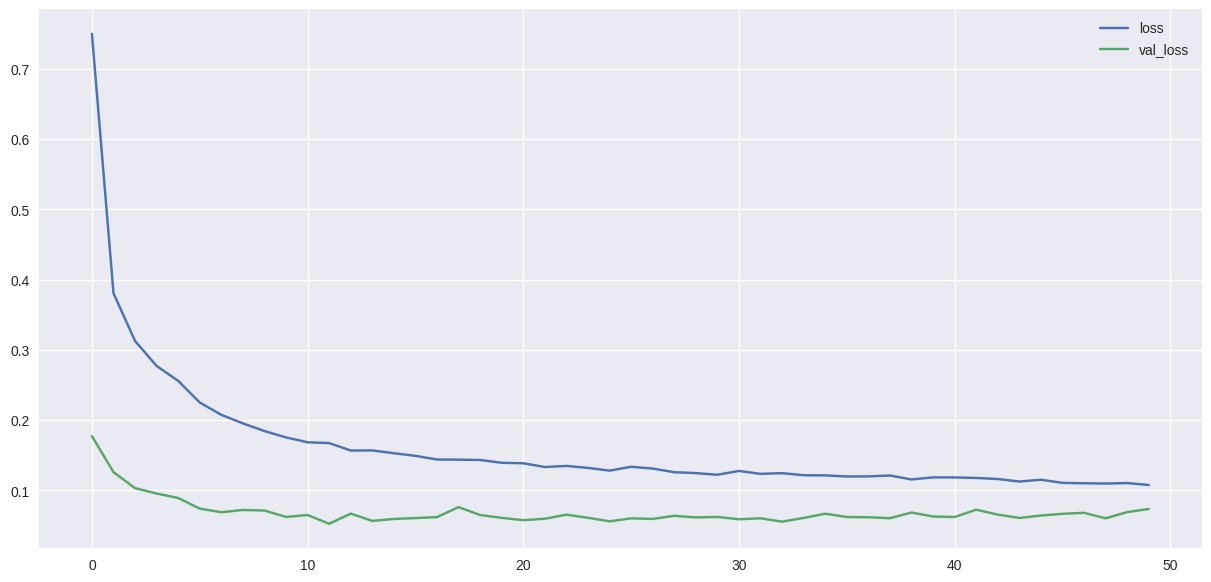

In [176]:
plt.figure(figsize=(15,7))
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

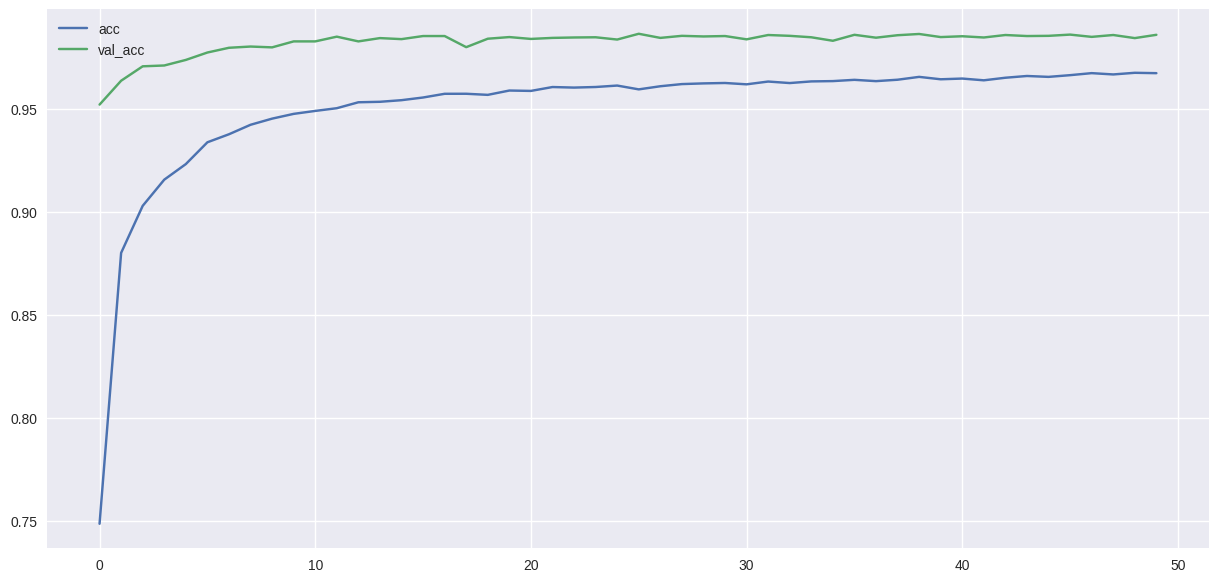

In [168]:
plt.figure(figsize=(15,7))
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


Normalized confusion matrix


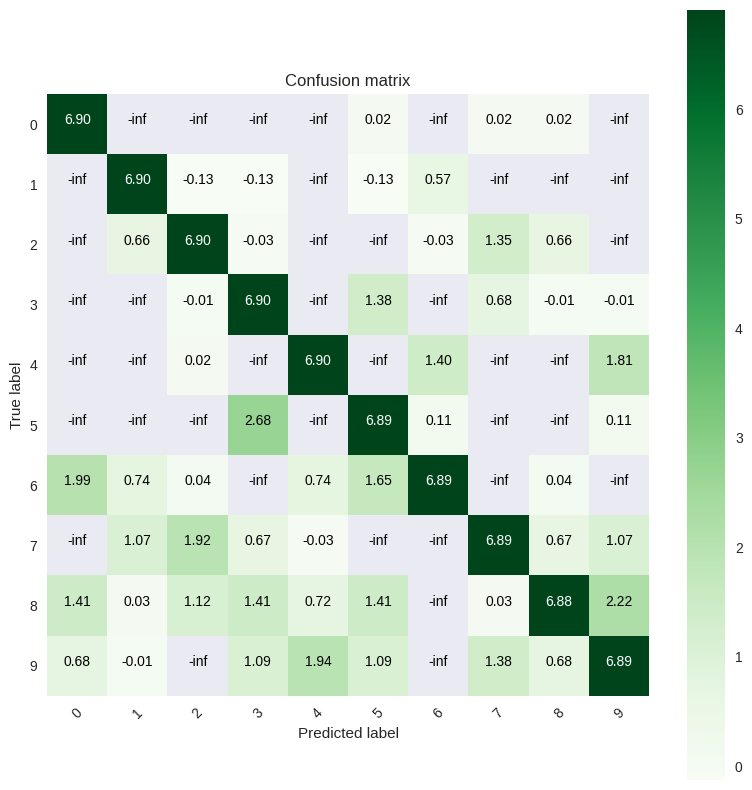

In [173]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = np.log(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*1000)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.figure(figsize=[8,8])
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b=None)
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)), normalize=True)

In [170]:
if x_train.shape[-1] != x_train.shape[-2]:
    x_test = np.squeeze(x_test, -1)
    x_train = np.squeeze(x_train, -1)
print(x_train.shape)

(60000, 28, 28)


Number of Misclassified labels: 139 Out of: 10000 ( 1.39 % )



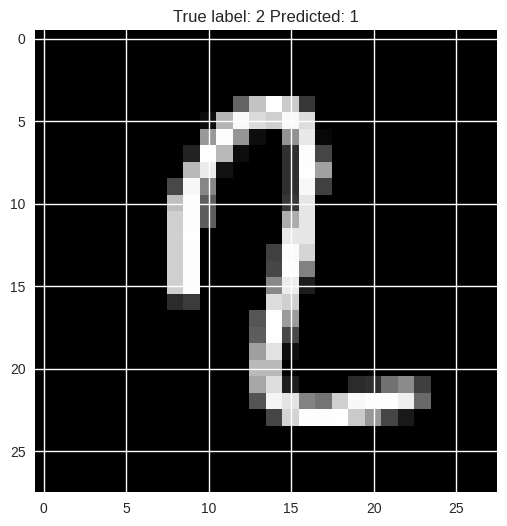

In [171]:
# Show some misclassified examples
plt.figure(figsize=[6,6])
misclassified_idx = np.where(p_test != y_test)[0]
print("Number of Misclassified labels:", len(misclassified_idx), "Out of:", len(p_test), "(", len(misclassified_idx)/len(p_test)*100, "% )\n")
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));